In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, neighbors
)

In [8]:
dataset = datasets.load_wine()
dataframe = pd.DataFrame(dataset.data, dataset.target)
dataframe["target"] = dataset.target
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [10]:
(train_ftrs, test_ftrs, 
 train_trgt, test_trgt) = skms.train_test_split(dataset.data, dataset.target, test_size=0.25)

In [16]:
predict = (neighbors.KNeighborsClassifier()
                    .fit(train_ftrs, train_trgt)
                    .predict(test_ftrs))
score = metrics.accuracy_score(test_trgt, predict)

Text(253.58159722222234, 0.5, 'Actual')

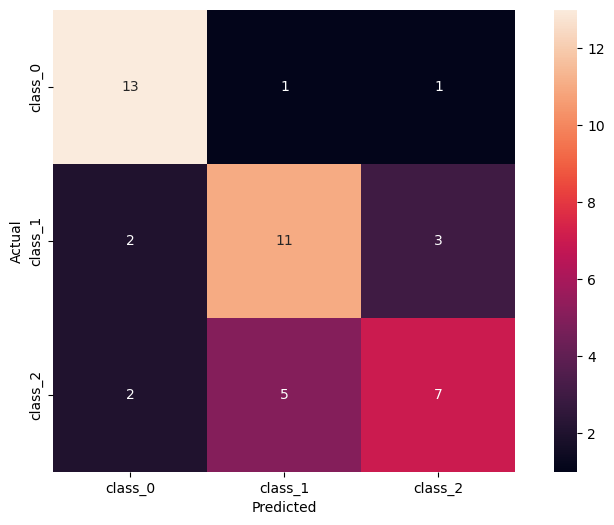

In [26]:
# making the confusion matrix.
fig, ax = plt.subplots(figsize=(10, 6))
confusion_matrix = metrics.confusion_matrix(test_trgt, predict)
sns.heatmap(confusion_matrix, annot=True, square=True,
           xticklabels=dataset.target_names,
           yticklabels=dataset.target_names)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")